In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alekseimedvedev","key":"e7e2e8ad9f177293686bb5c420c22c41"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d houcembenmansour/predict-diabetes-based-on-diagnostic-measures

predict-diabetes-based-on-diagnostic-measures.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip '/content/predict-diabetes-based-on-diagnostic-measures.zip' -d '/content/predict-diabetes-based-on-diagnostic-measures'

Archive:  /content/predict-diabetes-based-on-diagnostic-measures.zip
replace /content/predict-diabetes-based-on-diagnostic-measures/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/predict-diabetes-based-on-diagnostic-measures/diabetes.csv')
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [ ]:
target=df['diabetes']
df=df.drop(['diabetes'],axis=1)
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84"
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83"
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89"
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79"
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82"


In [ ]:
target.value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [ ]:
codes = {'No diabetes': 0, 'Diabetes': 1}
target=target.map(codes)
target.value_counts()

0    330
1     60
Name: diabetes, dtype: int64

In [ ]:
df=df.drop(['patient_number'],axis=1)
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84"
1,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83"
2,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89"
3,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79"
4,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82"


In [ ]:
df.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender',
       'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist',
       'hip', 'waist_hip_ratio'],
      dtype='object')

In [ ]:
df.isna().sum()

cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
dtype: int64

In [ ]:
categ=['gender']
cont=[]
for col in df.columns:
  if col not in categ:
    cont.append(col)

In [ ]:
categ

['gender']

In [ ]:
cont

['cholesterol',
 'glucose',
 'hdl_chol',
 'chol_hdl_ratio',
 'age',
 'height',
 'weight',
 'bmi',
 'systolic_bp',
 'diastolic_bp',
 'waist',
 'hip',
 'waist_hip_ratio']

In [ ]:
for col in df.columns:
  print('{} : {}'.format(col, len(df[col].unique())))

cholesterol : 153
glucose : 116
hdl_chol : 75
chol_hdl_ratio : 69
age : 68
gender : 2
height : 22
weight : 139
bmi : 193
systolic_bp : 71
diastolic_bp : 56
waist : 30
hip : 32
waist_hip_ratio : 39


In [ ]:
for name in categ:
    dummies = pd.get_dummies(df[name], prefix=name, drop_first=False)
    df=pd.concat([df,dummies],axis=1)
df=df.drop(columns=categ)
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,"3,9",19,61,119,"22,5",118,70,32,38,"0,84",1,0
1,146,79,41,"3,6",19,60,135,"26,4",108,58,33,40,"0,83",1,0
2,217,75,54,4,20,67,187,"29,3",110,72,40,45,"0,89",1,0
3,226,97,70,"3,2",20,64,114,"19,6",122,64,31,39,"0,79",1,0
4,164,91,67,"2,4",20,70,141,"20,2",122,86,32,39,"0,82",1,0


In [ ]:
def replace_comma(x):
  return float(x.replace(',','.'))
bad_cols=['chol_hdl_ratio','bmi', 'waist_hip_ratio']
for col in bad_cols:
  df[col]=df[col].map(lambda x: float(x.replace(',','.')))
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0
1,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0
2,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,1,0
3,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0
4,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0


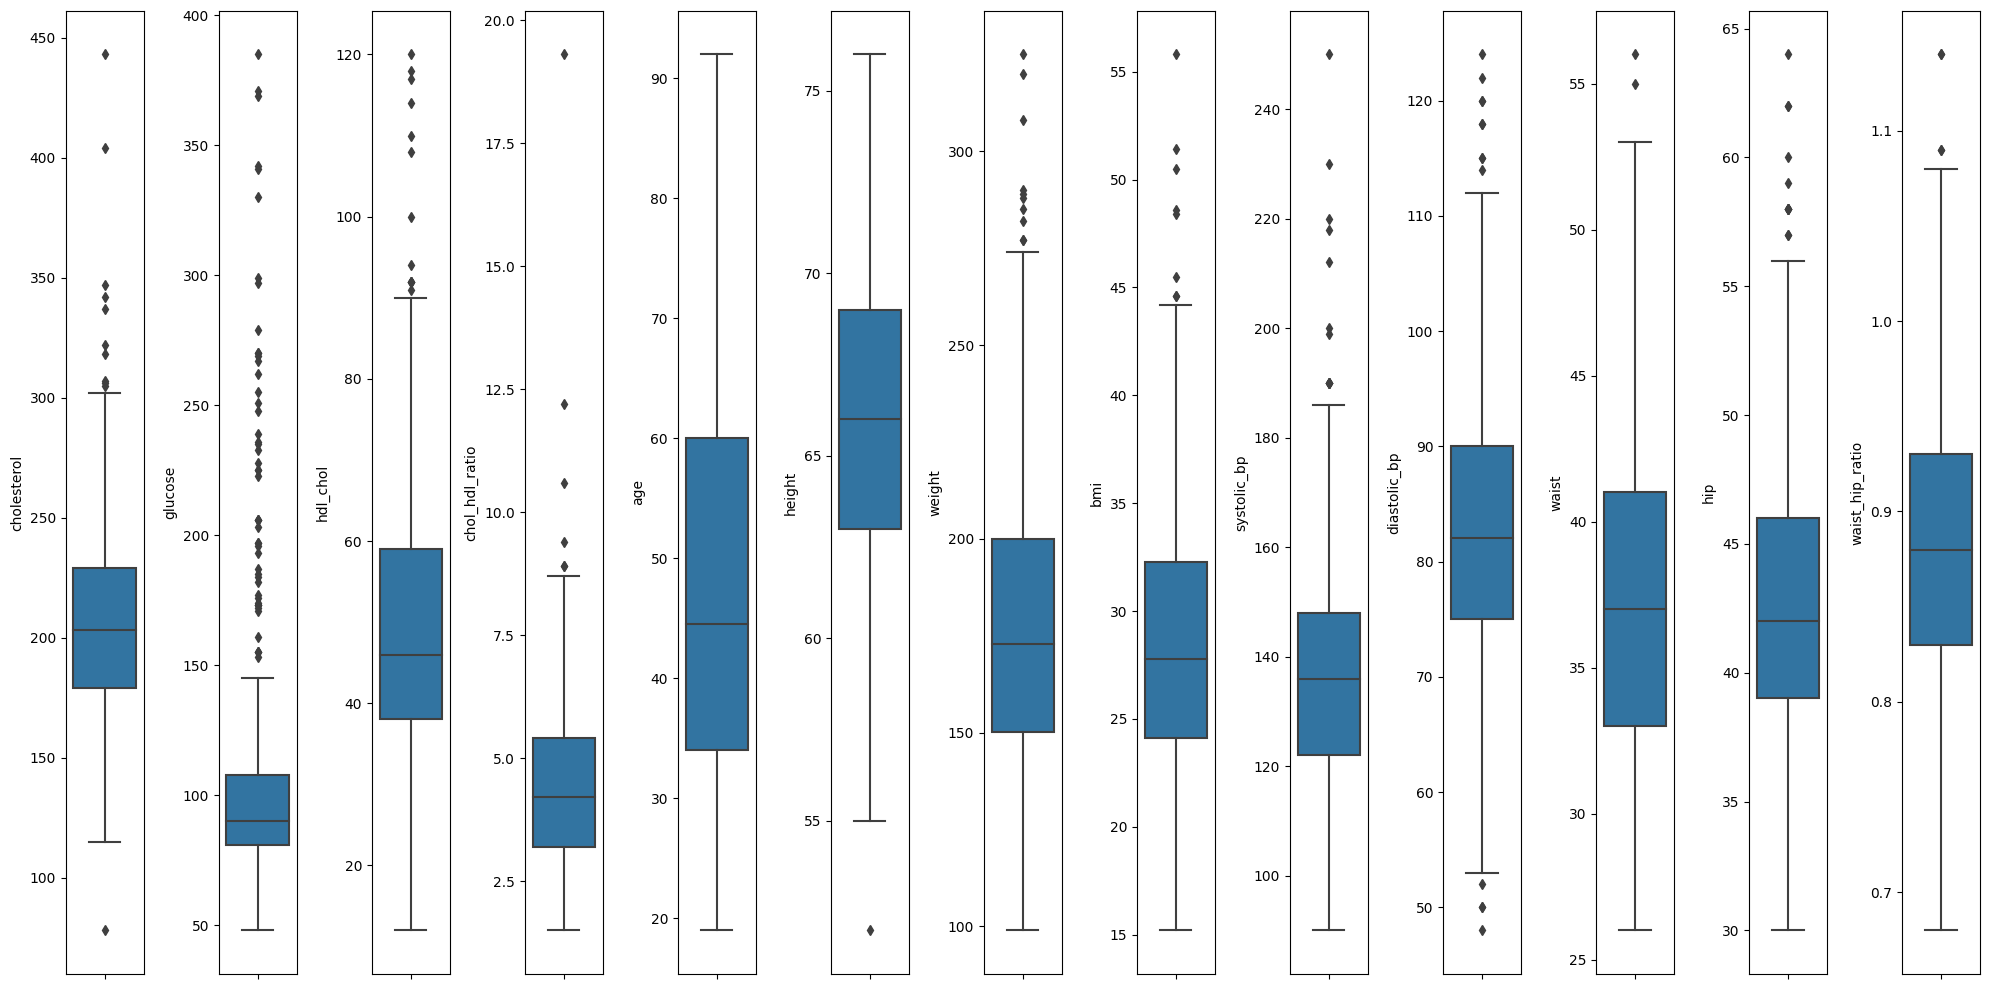

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df[cont]=rs.fit_transform(df[cont])
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,-0.20,-0.485981,0.142857,-0.136364,-0.980769,-0.833333,-1.085427,-0.648318,-0.692308,-0.800000,-0.625,-0.571429,-0.4,1,0
1,-1.14,-0.411215,-0.238095,-0.272727,-0.980769,-1.000000,-0.763819,-0.171254,-1.076923,-1.600000,-0.500,-0.285714,-0.5,1,0
2,0.28,-0.560748,0.380952,-0.090909,-0.942308,0.166667,0.281407,0.183486,-1.000000,-0.666667,0.375,0.428571,0.1,1,0
3,0.46,0.261682,1.142857,-0.454545,-0.942308,-0.333333,-1.185930,-1.003058,-0.538462,-1.200000,-0.750,-0.428571,-0.9,1,0
4,-0.78,0.037383,1.000000,-0.818182,-0.942308,0.666667,-0.643216,-0.929664,-0.538462,0.266667,-0.625,-0.428571,-0.6,1,0


In [ ]:
rs.inverse_transform(df[cont])[:5,:]

array([[193.  ,  77.  ,  49.  ,   3.9 ,  19.  ,  61.  , 119.  ,  22.5 ,
        118.  ,  70.  ,  32.  ,  38.  ,   0.84],
       [146.  ,  79.  ,  41.  ,   3.6 ,  19.  ,  60.  , 135.  ,  26.4 ,
        108.  ,  58.  ,  33.  ,  40.  ,   0.83],
       [217.  ,  75.  ,  54.  ,   4.  ,  20.  ,  67.  , 187.  ,  29.3 ,
        110.  ,  72.  ,  40.  ,  45.  ,   0.89],
       [226.  ,  97.  ,  70.  ,   3.2 ,  20.  ,  64.  , 114.  ,  19.6 ,
        122.  ,  64.  ,  31.  ,  39.  ,   0.79],
       [164.  ,  91.  ,  67.  ,   2.4 ,  20.  ,  70.  , 141.  ,  20.2 ,
        122.  ,  86.  ,  32.  ,  39.  ,   0.82]])

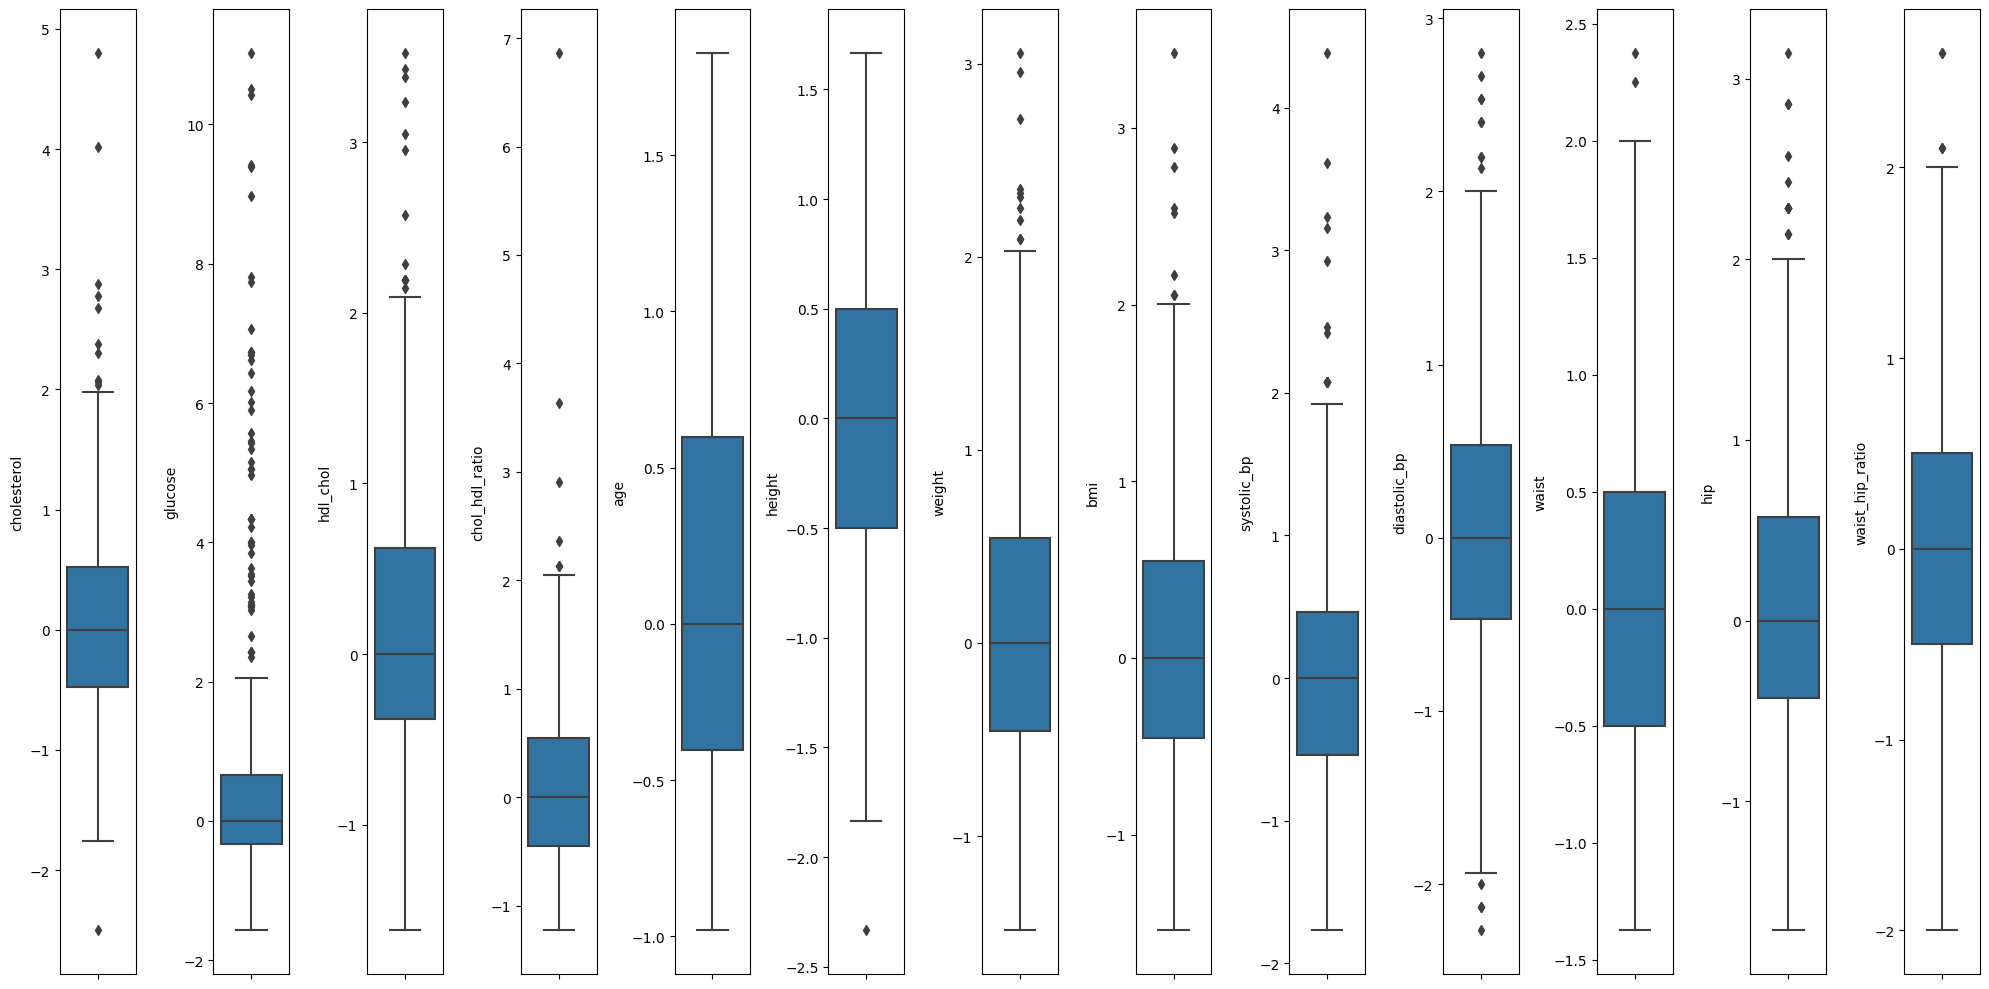

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [ ]:
corr = df[cont].corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Корреляция непрерывных признаков")\
    .set_table_styles(magnify())

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
cholesterol,1.000,0.158,0.193,0.476,0.247,-0.064,0.062,0.092,0.208,0.166,0.134,0.093,0.092
glucose,0.158,1.000,-0.158,0.282,0.294,0.098,0.190,0.129,0.163,0.020,0.222,0.138,0.185
hdl_chol,0.193,-0.158,1.000,-0.682,0.028,-0.087,-0.292,-0.242,0.032,0.078,-0.277,-0.224,-0.159
chol_hdl_ratio,0.476,0.282,-0.682,1.000,0.163,0.081,0.279,0.228,0.116,0.038,0.313,0.209,0.243
age,0.247,0.294,0.028,0.163,1.000,-0.082,-0.057,-0.009,0.453,0.069,0.151,0.005,0.275
height,-0.064,0.098,-0.087,0.081,-0.082,1.000,0.255,-0.260,-0.041,0.044,0.057,-0.096,0.253
weight,0.062,0.190,-0.292,0.279,-0.057,0.255,1.000,0.860,0.097,0.166,0.848,0.827,0.250
bmi,0.092,0.129,-0.242,0.228,-0.009,-0.260,0.860,1.000,0.121,0.145,0.811,0.882,0.101
systolic_bp,0.208,0.163,0.032,0.116,0.453,-0.041,0.097,0.121,1.000,0.604,0.211,0.155,0.138
diastolic_bp,0.166,0.020,0.078,0.038,0.069,0.044,0.166,0.145,0.604,1.000,0.166,0.144,0.078


In [ ]:
X=df.values
y=target.values

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=[0,1], y=y)
class_weights = np.array([x for x in class_weights], dtype=np.float32)
class_weights

array([0.59090906, 3.25      ], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_dum, y_train, y_dum=train_test_split(X,y, test_size=0.2)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [ ]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(data)
      self.targets = torch.LongTensor(targets)
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def get_labels(self):
    return self.targets

  def __len__(self):
      return len(self.data)

In [ ]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [ ]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 39
Длина валидационной выборки: 39
Длина тренировочной выборки: 312


In [ ]:
train_dataset[0]

(tensor([-0.6000,  5.0467, -0.7143,  0.6364,  0.0962,  1.1667,  1.7487,  0.7951,
          0.5385,  1.0667,  0.6250,  0.7143,  0.1000,  0.0000,  1.0000]),
 tensor(1))

In [ ]:
! pip install torchsampler

In [ ]:
from torchsampler import ImbalancedDatasetSampler

In [ ]:
batch_size=16 # размер пакета
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False,
                          sampler=ImbalancedDatasetSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [ ]:
class Classification_Model_FFNN(nn.Module):
  def __init__(self, num_inputs, num_classes):
      super(Classification_Model_FFNN, self).__init__()
      self.pipe = nn.Sequential(
          nn.Linear(num_inputs, 64, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(64),

          nn.Linear(64, 48, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(48),

          nn.Linear(48, 32, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(32),

          nn.Linear(32, 16, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(16),

          nn.Linear(16, num_classes))

  def forward(self, x):
      return self.pipe(x)

In [ ]:
model=Classification_Model_FFNN(15,2)
model.to(device);

In [ ]:
#! pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model,input_size=(1, 15))

Layer (type:depth-idx)                   Output Shape              Param #
Classification_Model_FFNN                [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Linear: 2-1                       [1, 64]                   960
│    └─ReLU6: 2-2                        [1, 64]                   --
│    └─BatchNorm1d: 2-3                  [1, 64]                   128
│    └─Linear: 2-4                       [1, 48]                   3,072
│    └─ReLU6: 2-5                        [1, 48]                   --
│    └─BatchNorm1d: 2-6                  [1, 48]                   96
│    └─Linear: 2-7                       [1, 32]                   1,536
│    └─ReLU6: 2-8                        [1, 32]                   --
│    └─BatchNorm1d: 2-9                  [1, 32]                   64
│    └─Linear: 2-10                      [1, 16]                   512
│    └─ReLU6: 2-11                       [1, 16]                   --
│    └

In [ ]:
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [ ]:
from tqdm import tqdm

In [ ]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [ ]:
train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss= 0.
  running_acc = 0.
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
      running_acc += accuracy(outputs,targets)

  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [ ]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)

            running_loss += loss.item()
            running_acc += accuracy(outputs,targets)

        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [ ]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopper(patience=5, min_delta=0.1)
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)
    if val_accs[-1] > best_acc:
       torch.save(model, 'best-model.pt')
       best_acc = val_accs[-1]
    if early_stopper.early_stop(val_losses[-1]):
      break


Epoch : 1


100%|██████████| 20/20 [00:00<00:00, 278.16it/s]


Средняя ошибка модели на тренировочной выборке: 0.5768   Средняя точность модели на тренировочной выборке: 0.7563

Epoch : 1


100%|██████████| 3/3 [00:00<00:00, 520.17it/s]


Средняя ошибка модели на валидационной выборке: 0.5656   Средняя точность модели на валидационной выборке: 0.8274

Epoch : 2


100%|██████████| 20/20 [00:00<00:00, 299.64it/s]


Средняя ошибка модели на тренировочной выборке: 0.3862   Средняя точность модели на тренировочной выборке: 0.8469

Epoch : 2


100%|██████████| 3/3 [00:00<00:00, 692.24it/s]


Средняя ошибка модели на валидационной выборке: 0.4734   Средняя точность модели на валидационной выборке: 0.8006

Epoch : 3


100%|██████████| 20/20 [00:00<00:00, 288.73it/s]


Средняя ошибка модели на тренировочной выборке: 0.3008   Средняя точность модели на тренировочной выборке: 0.8750

Epoch : 3


100%|██████████| 3/3 [00:00<00:00, 521.66it/s]


Средняя ошибка модели на валидационной выборке: 0.3975   Средняя точность модели на валидационной выборке: 0.8750

Epoch : 4


100%|██████████| 20/20 [00:00<00:00, 284.12it/s]


Средняя ошибка модели на тренировочной выборке: 0.2334   Средняя точность модели на тренировочной выборке: 0.8906

Epoch : 4


100%|██████████| 3/3 [00:00<00:00, 377.32it/s]


Средняя ошибка модели на валидационной выборке: 0.4210   Средняя точность модели на валидационной выборке: 0.8750

Epoch : 5


100%|██████████| 20/20 [00:00<00:00, 293.32it/s]


Средняя ошибка модели на тренировочной выборке: 0.2247   Средняя точность модели на тренировочной выборке: 0.8656

Epoch : 5


100%|██████████| 3/3 [00:00<00:00, 626.36it/s]


Средняя ошибка модели на валидационной выборке: 0.4230   Средняя точность модели на валидационной выборке: 0.8482

Epoch : 6


100%|██████████| 20/20 [00:00<00:00, 293.84it/s]


Средняя ошибка модели на тренировочной выборке: 0.1739   Средняя точность модели на тренировочной выборке: 0.9000

Epoch : 6


100%|██████████| 3/3 [00:00<00:00, 412.41it/s]


Средняя ошибка модели на валидационной выборке: 0.5057   Средняя точность модели на валидационной выборке: 0.8214

Epoch : 7


100%|██████████| 20/20 [00:00<00:00, 236.77it/s]


Средняя ошибка модели на тренировочной выборке: 0.1699   Средняя точность модели на тренировочной выборке: 0.9094

Epoch : 7


100%|██████████| 3/3 [00:00<00:00, 580.77it/s]


Средняя ошибка модели на валидационной выборке: 0.9194   Средняя точность модели на валидационной выборке: 0.8482

Epoch : 8


100%|██████████| 20/20 [00:00<00:00, 264.16it/s]


Средняя ошибка модели на тренировочной выборке: 0.1786   Средняя точность модели на тренировочной выборке: 0.8781

Epoch : 8


100%|██████████| 3/3 [00:00<00:00, 548.94it/s]


Средняя ошибка модели на валидационной выборке: 0.3794   Средняя точность модели на валидационной выборке: 0.8750

Epoch : 9


100%|██████████| 20/20 [00:00<00:00, 277.10it/s]


Средняя ошибка модели на тренировочной выборке: 0.1328   Средняя точность модели на тренировочной выборке: 0.9156

Epoch : 9


100%|██████████| 3/3 [00:00<00:00, 387.67it/s]


Средняя ошибка модели на валидационной выборке: 0.7195   Средняя точность модели на валидационной выборке: 0.7530

Epoch : 10


100%|██████████| 20/20 [00:00<00:00, 222.60it/s]


Средняя ошибка модели на тренировочной выборке: 0.1686   Средняя точность модели на тренировочной выборке: 0.9000

Epoch : 10


100%|██████████| 3/3 [00:00<00:00, 437.91it/s]


Средняя ошибка модели на валидационной выборке: 0.5432   Средняя точность модели на валидационной выборке: 0.8482

Epoch : 11


100%|██████████| 20/20 [00:00<00:00, 277.35it/s]


Средняя ошибка модели на тренировочной выборке: 0.1705   Средняя точность модели на тренировочной выборке: 0.8750

Epoch : 11


100%|██████████| 3/3 [00:00<00:00, 443.78it/s]


Средняя ошибка модели на валидационной выборке: 0.6180   Средняя точность модели на валидационной выборке: 0.7857

Epoch : 12


100%|██████████| 20/20 [00:00<00:00, 304.19it/s]


Средняя ошибка модели на тренировочной выборке: 0.1208   Средняя точность модели на тренировочной выборке: 0.9625

Epoch : 12


100%|██████████| 3/3 [00:00<00:00, 596.80it/s]


Средняя ошибка модели на валидационной выборке: 0.5250   Средняя точность модели на валидационной выборке: 0.8690

Epoch : 13


100%|██████████| 20/20 [00:00<00:00, 219.92it/s]


Средняя ошибка модели на тренировочной выборке: 0.1277   Средняя точность модели на тренировочной выборке: 0.9281

Epoch : 13


100%|██████████| 3/3 [00:00<00:00, 507.11it/s]


Средняя ошибка модели на валидационной выборке: 0.4386   Средняя точность модели на валидационной выборке: 0.8750

Epoch : 14


100%|██████████| 20/20 [00:00<00:00, 182.68it/s]


Средняя ошибка модели на тренировочной выборке: 0.1005   Средняя точность модели на тренировочной выборке: 0.9469

Epoch : 14


100%|██████████| 3/3 [00:00<00:00, 573.04it/s]


Средняя ошибка модели на валидационной выборке: 0.3907   Средняя точность модели на валидационной выборке: 0.9167

Epoch : 15


100%|██████████| 20/20 [00:00<00:00, 158.70it/s]


Средняя ошибка модели на тренировочной выборке: 0.1845   Средняя точность модели на тренировочной выборке: 0.8781

Epoch : 15


100%|██████████| 3/3 [00:00<00:00, 628.49it/s]

Средняя ошибка модели на валидационной выборке: 0.7256   Средняя точность модели на валидационной выборке: 0.8899


In [ ]:
best_acc

tensor(0.9167)

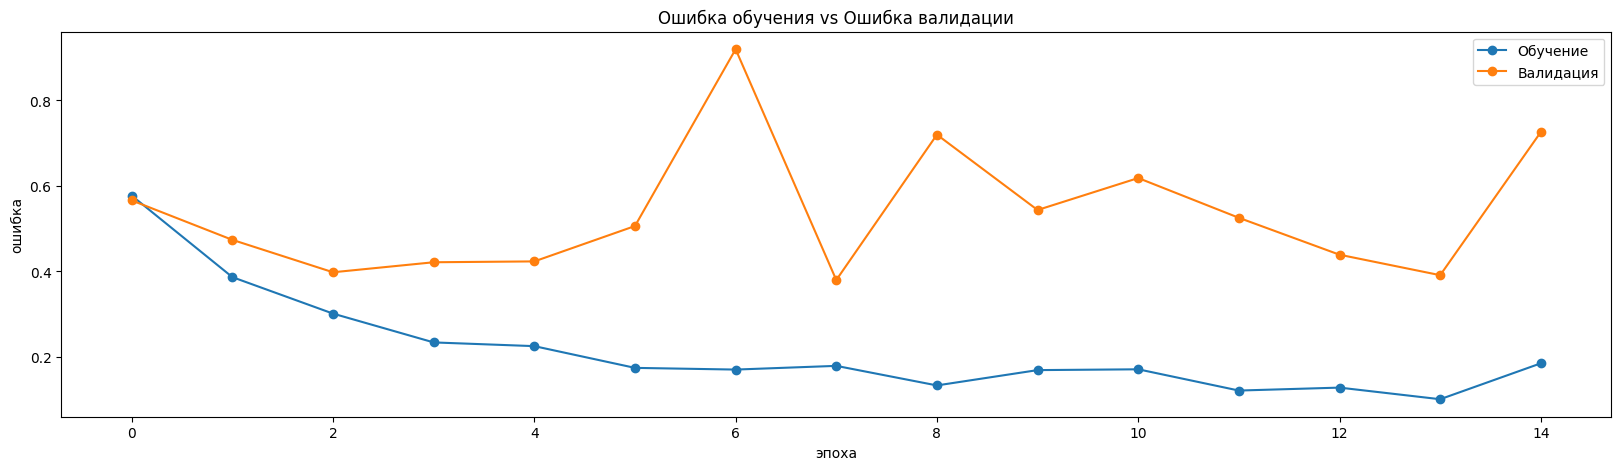

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

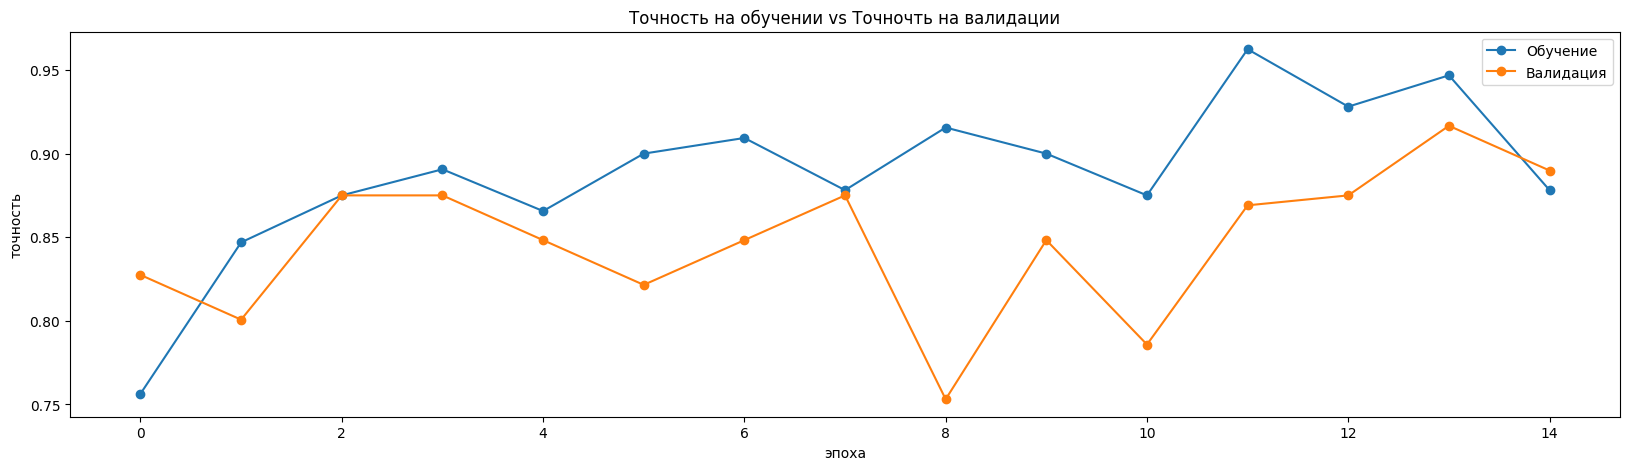

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность на обучении vs Точночть на валидации')
plt.show()

In [ ]:
model = torch.load('best-model.pt');
model.eval();

In [ ]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.data.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)

100%|██████████| 3/3 [00:00<00:00, 700.18it/s]


In [ ]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

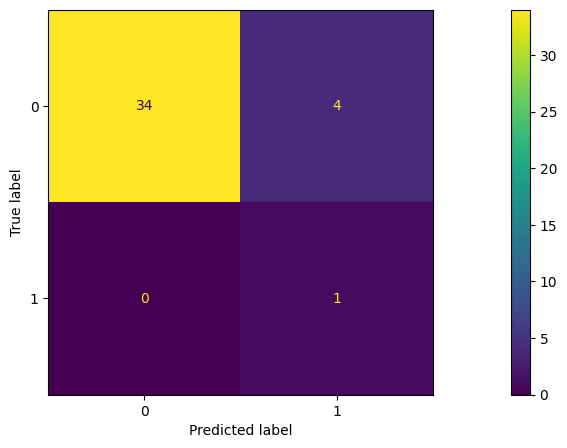

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
f1_score(targets, predictions,average='micro')

0.8974358974358975